In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config

In [4]:
import joblib

In [5]:
set_config(transform_output="pandas")

In [6]:
# data and model paths

data_path = "../data/interim/df_without_outliers.csv"

kmeans_path = "../models/mb_kmeans.joblib"
scaler_path = "../models/scaler.joblib"
encoder_path = "../models/encoder.joblib"
model_path = "../models/model.joblib"

In [7]:
# load the data

df = pd.read_csv(data_path, usecols=["pickup_longitude","pickup_latitude"])

df.shape

(33234199, 2)

In [8]:
# load the scaler and model

scaler = joblib.load(scaler_path)
kmeans = joblib.load(kmeans_path)

In [9]:
scaler

StandardScaler()

In [10]:
kmeans

MiniBatchKMeans(n_clusters=30, n_init=10, random_state=42)

In [11]:
# scale the input data

df_scaled = scaler.transform(df)

df_scaled.head()

,pickup_longitude,pickup_latitude
0,-0.443778,-0.601549
1,-0.182839,-0.777271
2,-0.285388,-2.626699
3,-0.528059,-1.178462
4,0.365612,1.111533


In [12]:
# get the cluster predictions

predictions = kmeans.predict(df_scaled)

c:\Users\Danjin\Downloads\uber-demand-prediction\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MiniBatchKMeans was fitted without feature names
  warnings.warn(


In [13]:
# add the predictions to data

df['region'] = predictions

df.head()

,pickup_longitude,pickup_latitude,region
0,-73.990372,40.734695,7
1,-73.980782,40.729912,26
2,-73.984550,40.679565,9
3,-73.993469,40.718990,10
4,-73.960625,40.781330,8


In [14]:
# form a region grp

region_grp = df.groupby("region")

In [15]:
# sample the data from each region

sampled_data = (
    region_grp
    .sample(500, random_state=42)
)

In [16]:
sampled_data.shape

(15000, 3)

In [17]:
sampled_data

,pickup_longitude,pickup_latitude,region
3269108,-73.961357,40.806641,0
31107559,-73.949677,40.801151,0
4464996,-73.954544,40.805717,0
27828548,-73.960274,40.813190,0
9889390,-73.962280,40.805012,0
...,...,...,...
36922,-73.945114,40.745949,29
5793772,-73.943207,40.753162,29
5042014,-73.945404,40.745926,29
31688583,-73.936272,40.750038,29


In [18]:
# value counts

sampled_data["region"].value_counts()

region
0     500
1     500
2     500
3     500
4     500
5     500
6     500
7     500
8     500
9     500
10    500
11    500
12    500
13    500
14    500
15    500
16    500
17    500
18    500
19    500
20    500
21    500
22    500
23    500
24    500
25    500
26    500
27    500
28    500
29    500
Name: count, dtype: int64

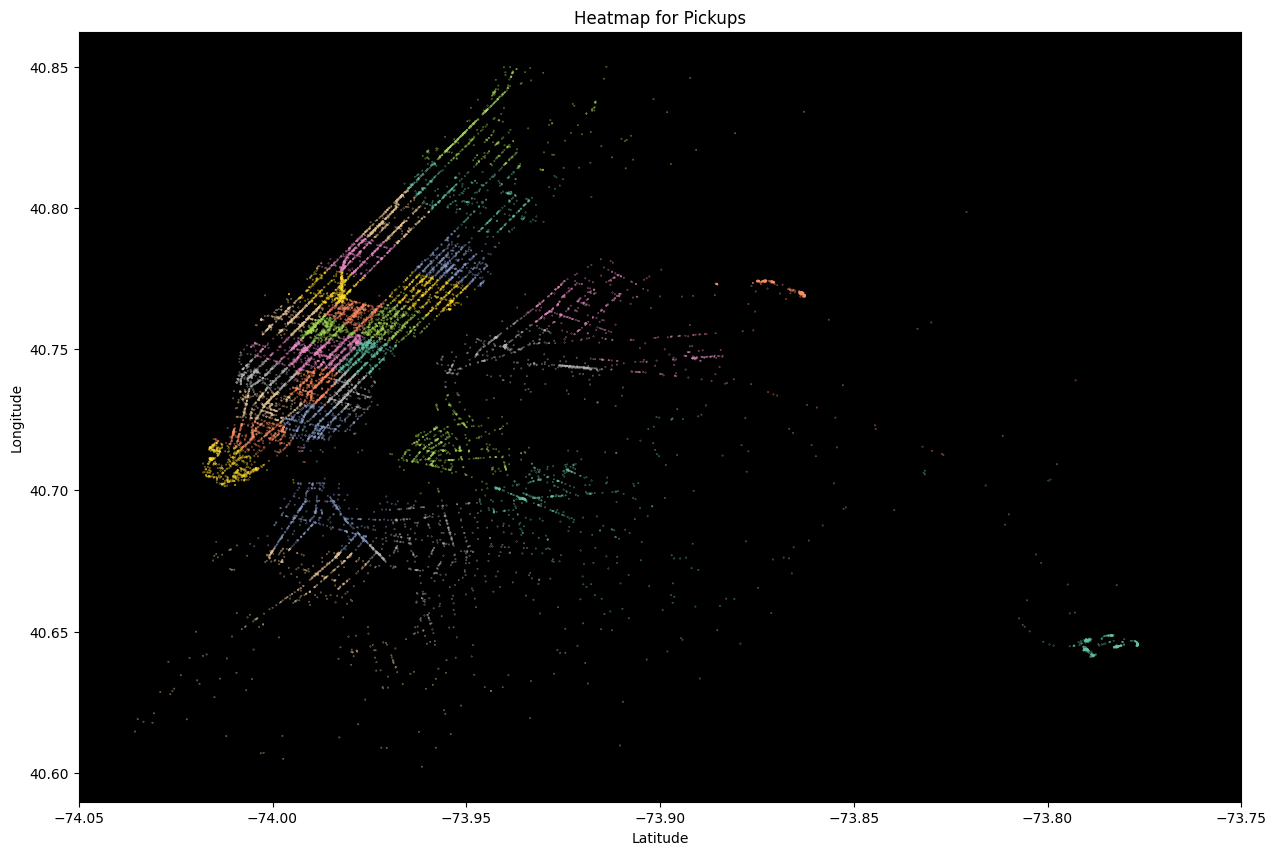

In [19]:
# plot the sampled data on scatterplot

fig,ax = plt.subplots(nrows=1,ncols=1,sharey=True,
                     figsize=(15,10))

ax.set_facecolor('k')
ax.set_xlim(left=-74.05, right=-73.75)

ax.scatter(sampled_data['pickup_longitude'],sampled_data['pickup_latitude'],
           s=0.05,c=sampled_data['region'],cmap="Set2")
ax.set_title('Heatmap for Pickups')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')

plt.show()

In [34]:
# save the sampled data

save_path = "../data/external/plot_data.csv"

sampled_data.to_csv(save_path, index=False)

In [21]:
# load the test data

data_path = "../data/processed/test.csv"

test_df = pd.read_csv(data_path, parse_dates=["tpep_pickup_datetime"]).set_index("tpep_pickup_datetime")

test_df

,lag_1,lag_2,lag_3,lag_4,region,total_pickups,avg_pickups,day_of_week
tpep_pickup_datetime,,,,,,,,
2016-03-01 00:00:00,36.0,44.0,31.0,29.0,0,41,39.0,1
2016-03-01 00:15:00,41.0,36.0,44.0,31.0,0,35,37.0,1
2016-03-01 00:30:00,35.0,41.0,36.0,44.0,0,47,41.0,1
2016-03-01 00:45:00,47.0,35.0,41.0,36.0,0,34,38.0,1
2016-03-01 01:00:00,34.0,47.0,35.0,41.0,0,30,35.0,1
...,...,...,...,...,...,...,...,...
2016-03-31 22:45:00,22.0,14.0,15.0,13.0,29,14,16.0,3
2016-03-31 23:00:00,14.0,22.0,14.0,15.0,29,17,16.0,3
2016-03-31 23:15:00,17.0,14.0,22.0,14.0,29,18,17.0,3


In [22]:
# split the data

X_test = test_df.drop(columns=["total_pickups"])
y_test = test_df["total_pickups"]

X_test

,lag_1,lag_2,lag_3,lag_4,region,avg_pickups,day_of_week
tpep_pickup_datetime,,,,,,,
2016-03-01 00:00:00,36.0,44.0,31.0,29.0,0,39.0,1
2016-03-01 00:15:00,41.0,36.0,44.0,31.0,0,37.0,1
2016-03-01 00:30:00,35.0,41.0,36.0,44.0,0,41.0,1
2016-03-01 00:45:00,47.0,35.0,41.0,36.0,0,38.0,1
2016-03-01 01:00:00,34.0,47.0,35.0,41.0,0,35.0,1
...,...,...,...,...,...,...,...
2016-03-31 22:45:00,22.0,14.0,15.0,13.0,29,16.0,3
2016-03-31 23:00:00,14.0,22.0,14.0,15.0,29,16.0,3
2016-03-31 23:15:00,17.0,14.0,22.0,14.0,29,17.0,3


In [23]:
encoder = joblib.load(encoder_path)

model = joblib.load(model_path)

In [24]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("encoder", encoder),
    ("model",model)
])

pipe

Pipeline(steps=[('encoder',
                 ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                                   remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['region', 'day_of_week'])])),
                ('model', LinearRegression())])

In [25]:
encoder

ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                  remainder='passthrough',
                  transformers=[('ohe',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['region', 'day_of_week'])])

In [26]:
# get the predictions

predictions = pipe.predict(X_test)

In [27]:
# sample row

sample_row = sampled_data.sample(1)

In [28]:
sample_row

,pickup_longitude,pickup_latitude,region
26960663,-73.959259,40.781174,8


In [29]:
# scale the coords

scaled_coords = scaler.transform(sample_row.iloc[:,0:2])

scaled_coords

,pickup_longitude,pickup_latitude
26960663,0.40277,1.105788


In [30]:
# calculate the distances from centroids

distances = kmeans.transform(scaled_coords).values.ravel().tolist()

c:\Users\Danjin\Downloads\uber-demand-prediction\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MiniBatchKMeans was fitted without feature names
  warnings.warn(


In [31]:
distances = list(enumerate(distances))

distances

[(0, 0.8748395588318436),
 (1, 1.3344281629646733),
 (2, 3.273449787117249),
 (3, 6.853630982689086),
 (4, 2.574049571086732),
 (5, 0.8703411398614781),
 (6, 2.4880769986149365),
 (7, 1.8171615200879752),
 (8, 0.16632010441743325),
 (9, 3.429569100246698),
 (10, 2.25645759371925),
 (11, 0.5076359182406607),
 (12, 1.5339347066554738),
 (13, 1.425100340444177),
 (14, 1.3253369019656667),
 (15, 1.1737688703109),
 (16, 2.4265831043193713),
 (17, 1.7359594173223756),
 (18, 0.8631105070693065),
 (19, 0.7757136994163109),
 (20, 2.9965324624883376),
 (21, 0.42888627811465285),
 (22, 2.195121974574465),
 (23, 0.5819474294136707),
 (24, 4.268221240731978),
 (25, 1.2080419630802641),
 (26, 1.7746628730440248),
 (27, 1.8936825366352954),
 (28, 3.770645487360576),
 (29, 1.3860223761604171)]

In [32]:
# sort the distances

indexes = [ind[0] for ind in sorted(distances, key=lambda x: x[1])][0:9]

indexes

[8, 21, 11, 23, 19, 18, 5, 0, 15]